# Ensamble
Autor: **Emiliano Carrillo Moncayo**  
Materia: **Minería de Datos**  


## 1. Preprocesar archivo de texto

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
%matplotlib inline

nombre_archivo = "data/data2"
## **************************************

try:
    with open( nombre_archivo + ".txt", "r") as archivo:
        nElem = int(archivo.readline())
        nAtrib = int(archivo.readline())
        nClases = int(archivo.readline())
        
        atributos = []
        for i in range(0, nAtrib):
            atributos.append("atrib_" + str(i+1))
        
        atributos.append("clase")
        data = pd.read_csv(archivo, delimiter=',', header=None)
        data.columns = atributos
    
except FileNotFoundError:
    print( "ERROR: El archivo " + nombre_archivo + " no fue encontrado");
finally:
    archivo.close();

dataset = data;

## **************************************
x_fin = dataset.drop('clase', 1)
y_fin = dataset['clase']
nComponentes = "Sin Componentes"

dataset.head()

,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8,atrib_9,atrib_10,...,atrib_377,atrib_378,atrib_379,atrib_380,atrib_381,atrib_382,atrib_383,atrib_384,atrib_385,clase
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,-0.25,...,0.980381,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.803851,0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,-0.25,...,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.745726,0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,-0.25,...,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.687600,0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,-0.25,...,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.629474,0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,-0.25,...,0.976833,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.571348,0


## 2. Preprocesar datos (Estandarizar)

In [4]:
x = dataset.drop('clase', 1)
y = dataset['clase']

x_estandarizada = StandardScaler().fit_transform(x)

try:
    atributos.remove('clase')
except:
    print('')
    
x_fin = pd.DataFrame(data = x_estandarizada, columns = atributos)
x_fin.head()

,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8,atrib_9,atrib_10,...,atrib_376,atrib_377,atrib_378,atrib_379,atrib_380,atrib_381,atrib_382,atrib_383,atrib_384,atrib_385
0,-0.458699,-0.307113,-0.243608,-0.307003,-0.518008,-0.675602,-1.003106,-0.760053,-0.659573,-0.1849,...,-1.346831,2.398449,-0.608699,-0.69581,-0.707798,-0.499451,-0.009384,-1.20185,-0.641154,-0.332086
1,-0.458699,-0.307113,-0.243608,-0.307003,-0.518008,-0.675602,-1.003106,-0.760053,-0.659573,-0.1849,...,-1.346831,2.388748,-0.608699,-0.69581,-0.707798,-0.499451,-0.009384,-1.20185,-0.641154,-0.339097
2,-0.458699,-0.307113,-0.243608,-0.307003,-0.518008,-0.675602,-1.003106,-0.760053,-0.659573,-0.1849,...,-1.346831,2.388748,-0.608699,-0.69581,-0.707798,-0.499451,-0.009384,-1.20185,-0.641154,-0.346107
3,-0.458699,-0.307113,-0.243608,-0.307003,-0.518008,-0.675602,-1.003106,-0.760053,-0.659573,-0.1849,...,-1.346831,2.388748,-0.608699,-0.69581,-0.707798,-0.499451,-0.009384,-1.20185,-0.641154,-0.353118
4,-0.458699,-0.307113,-0.243608,-0.307003,-0.518008,-0.675602,-1.003106,-0.760053,-0.659573,-0.1849,...,-1.346831,2.388245,-0.608699,-0.69581,-0.707798,-0.499451,-0.009384,-1.20185,-0.641154,-0.360128


## 3. PCA

In [7]:
nComponentesWidget = widgets.BoundedIntText(
    min=1,
    max=nAtrib,
    step=1,
    description='n_comps:',
)
nComponentesWidget

BoundedIntText(value=1, description='n_comps:', max=385, min=1)

In [10]:
pca = PCA(n_components= 30)
atributos = []
for i in range(30):
    atributos.append('PC'+ str(i+1))
x_pca = pca.fit_transform(x_estandarizada)
pca_dataframe = pd.DataFrame(data = x_pca, columns=atributos)

x_fin = pca_dataframe
x_fin.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,10.460596,-3.339109,-4.563161,3.327759,-2.208121,6.064103,-4.216890,-2.282480,2.566458,-0.184194,...,3.289986,-3.362592,3.368734,1.235155,1.622031,-1.376425,0.344690,-1.868855,-0.626166,-0.225752
1,10.476073,-3.105652,-4.598310,3.396971,-2.553714,6.859681,-4.514791,-2.525036,2.475475,-0.264140,...,3.089561,-3.950896,3.206424,1.015040,1.393166,-0.730817,-0.082355,-2.178043,0.096570,0.324409
2,10.461930,-3.080342,-4.655892,3.387952,-2.533418,7.027484,-4.408574,-2.720884,2.408274,-0.350027,...,2.991455,-4.084362,3.189334,1.082450,1.278291,-0.504518,-0.374555,-2.195853,0.204466,0.541345
3,10.266744,-3.118854,-4.481004,3.101231,-2.716013,6.562618,-3.877002,-2.767032,2.268119,-0.407711,...,3.191954,-3.891292,3.143225,1.843030,1.062003,-1.017713,-0.202111,-2.225519,0.175120,-0.038451
4,10.291467,-3.159250,-4.525222,3.179001,-2.780219,6.549292,-3.847466,-2.891800,2.291335,-0.392369,...,3.254922,-3.811212,2.976277,1.694331,0.967052,-1.020780,-0.107664,-2.242664,0.045540,0.020421


## 4. Modelos de Clasificadores

In [11]:
foldsWidget = widgets.BoundedIntText(
    min=2,
    max=30,
    step=1,
    description='kFolds:',
)
foldsWidget

BoundedIntText(value=2, description='kFolds:', max=30, min=2)

In [12]:
folds = foldsWidget.value
folds

10

### 4.1 KNN

In [13]:
neighborsWidget = widgets.BoundedIntText(
    min=1,
    max=10,
    step=1,
    description='vecinos:',
)
neighborsWidget

BoundedIntText(value=1, description='vecinos:', max=10, min=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

model_1 = KNeighborsClassifier(n_neighbors= neighborsWidget.value)

scores = cross_val_score(model_1, x_fin, y_fin, cv=folds)

print ("Puntuaciónes de la Validación Cruzada:\n", scores)
print("\nPrecisión del k-Fold:\n %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Puntuaciónes de la Validación Cruzada:
 [0.83673469 0.97959184 0.95918367 0.97959184 1.         0.89583333
 0.97916667 1.         0.9375     0.8125    ]

Precisión del k-Fold:
 0.94 (+/- 0.13)


In [21]:
y_fin

0      0
1      0
2      0
3      0
4      0
      ..
479    5
480    5
481    5
482    5
483    5
Name: clase, Length: 484, dtype: int64

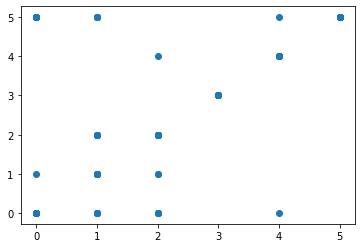

In [16]:
pred_1 = cross_val_predict(model_1, x_fin, y_fin, cv= folds)
plt.scatter(y_fin, pred_1)

In [197]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("******* CLASIFICADOR KNN *******\n")
print("Matriz de confusión: ")
print(confusion_matrix(y_fin, pred_1))
print("\nReporte de clasificación: ")
print(classification_report(y_fin, pred_1))
print("\nPuntaje de precisión: ")
print(accuracy_score(y_fin, pred_1))

******* CLASIFICADOR KNN *******

Matriz de confusión: 
[[ 59   1   0   0   0   7]
 [  2 218   0   0   0   4]
 [  4   2  35   0   1   0]
 [  0   0   0  22   0   0]
 [  1   0   0   0  37   4]
 [  0   0   0   0   1  86]]

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        67
           1       0.99      0.97      0.98       224
           2       1.00      0.83      0.91        42
           3       1.00      1.00      1.00        22
           4       0.95      0.88      0.91        42
           5       0.85      0.99      0.91        87

    accuracy                           0.94       484
   macro avg       0.95      0.93      0.93       484
weighted avg       0.95      0.94      0.94       484


Puntaje de precisión: 
0.9442148760330579


In [200]:
#save best model
knn_best = model_1;

## Neural Network

In [207]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=300)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

model_2 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
model_2.fit(X_train, y_train)

# Best paramete set
print('Best parameters found:\n', model_2.best_params_)

# All results
means = model_2.cv_results_['mean_test_score']
stds = model_2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model_2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.969 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.979 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.974 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.974 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.972 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.977 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 

In [208]:
y_true, pred_2 = y_test , model_2.predict(X_test)

In [209]:
print("******* CLASIFICADOR NEURAL NET*******\n")
print("Matriz de confusión: ")
print(confusion_matrix(y_test, pred_2))
print("\nReporte de clasificación: ")
print(classification_report(y_test, pred_2))
print("\nPuntaje de precisión: ")
print(accuracy_score(y_test, pred_2))

******* CLASIFICADOR NEURAL NET*******

Matriz de confusión: 
[[11  1  0  0  0  0]
 [ 0 41  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 20]]

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.98      1.00      0.99        41
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        20

    accuracy                           0.99        97
   macro avg       1.00      0.99      0.99        97
weighted avg       0.99      0.99      0.99        97


Puntaje de precisión: 
0.9896907216494846


In [210]:
#save best model
nn_best = model_2


## Naive Bayes

In [211]:
from sklearn.naive_bayes import GaussianNB

model_3 = GaussianNB().fit(X_train, y_train)
pred_3 = model_3.predict(X_test)

In [212]:
print("******* CLASIFICADOR NAIVE BAYES *******\n")
print("Matriz de confusión: ")
print(confusion_matrix(y_test, pred_3))
print("\nReporte de clasificación: ")
print(classification_report(y_test, pred_3))
print("\nPuntaje de precisión: ")
print(accuracy_score(y_test, pred_3))

******* CLASIFICADOR NAIVE BAYES *******

Matriz de confusión: 
[[11  0  1  0  0  0]
 [ 1 34  5  0  0  1]
 [ 0  0 12  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  0  7  0]
 [ 0  0  0  0  1 19]]

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.97      0.83      0.89        41
           2       0.67      1.00      0.80        12
           3       1.00      1.00      1.00         4
           4       0.88      0.88      0.88         8
           5       0.95      0.95      0.95        20

    accuracy                           0.90        97
   macro avg       0.90      0.93      0.91        97
weighted avg       0.92      0.90      0.90        97


Puntaje de precisión: 
0.8969072164948454


In [213]:
#save best model
nb_best = model_3

## Avance 3
https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

In [214]:
print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('neural net: {}'.format(nn_best.score(X_test, y_test)))
print('naive bayes: {}'.format(nb_best.score(X_test, y_test)))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models
estimators=[('knn', knn_best), ('nn', nn_best), ('nb', nb_best)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [ ]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

In [ ]:
pred = ensemble.predict(X_test)

In [ ]:
print("******* ENSAMBLE *******\n")
print("Matriz de confusión: ")
print(confusion_matrix(y_test, pred))
print("\nReporte de clasificación: ")
print(classification_report(y_test, pred))
print("\nPuntaje de precisión: ")
print(accuracy_score(y_test, pred))